#### Nhiễu (noise)
- Nhiễu là các pixel gây xáo trộn nội dung ảnh (mờ / chi tiết xoá trộn). 
- Có thể giả lập nhiễu để thêm vào ảnh nhờ các phân bố xác suất.
#### Các mô hình nhiễu
##### Gaussian noise
Phân bố Gaussian là phân bố chuẩn, tương đối chính xác với các thông tin, các quy luật trong thực tế. Các loại nhiễu mà phần bố tuân theo hàm mật độ xác suất (PDF - Probability Density Function) Gaussian

$$
p(z)=\frac{1}{\sqrt{2 \pi \sigma}} e^{\frac{-(z-\mu)^2}{2 \sigma^2}}
$$

Trong đó:
- $z$: giá trị mức xám
- $\mu$: giá trị trung bình của mức xám
- $\sigma^2$: phương sai
- $\sigma$: độ lệch chuẩn

<image src="Image\Gaussian Chart.png" width="50%" style="display: block; margin: 0 auto">

##### Gamma noise
Nhiễu Gamma là nhiễu mà phân bố của chúng tuân theo hàm mật độ xác suất:

$$
p(z)= \begin{cases}\frac{a^b z^{b-1}}{(b-1) !} e^{-a z} & z \geq 0 \\ 0 & z<0\end{cases}
$$

Trong đó:
- $z$: cường độ xám
- $b$: một số nguyên dương
- !: giai thừa

<image src="Image\Gamma Chart.png" width="50%" style="display: block; margin: 0 auto">

##### Các mô hình nhiễu khác

<image src="Image\Noise Chart.png" width="90%" style="display: block; margin: 0 auto">

##### GMM
##### HMM

Nhờ các mô hình nhiễu mà người ta tính được các nhiễu trong ảnh. Nhờ tính được các nhiễu này mà xoá được các nhiễu khỏi ảnh.

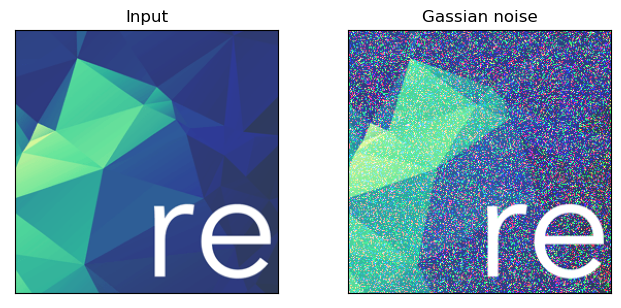

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

def Show(pos, image, name, gray=False, hideTisks=False):
    plt.subplot(pos)
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(name)
    if hideTisks:
        plt.xticks([]), plt.yticks([])

image = cv2.imread('Data\icon.png', cv2.IMREAD_COLOR)
(w, h, c) = image.shape
# Tạo nhiễu Gaussian
# Hàm normal để tạo phân bố chuẩn 
# (đồ thị phương trình được điều chỉnh theo phương sai u=0 (đối xứng qua Oy) và độ lệch chuẩn o=1)
gauss = np.random.normal(0,1,image.size)
gauss = gauss.reshape(w,h,c).astype('uint8')
# Thêm nhiễu vào ảnh
image_gauss = cv2.add(image, gauss)
# Hiển thị
fig = plt.gcf()
fig.set_size_inches(20 / 2.54, 40 / 2.54)
Show(421, image, "Input", False, True)
Show(422, image_gauss, "Gassian noise", False, True)
plt.show()